# Working with numerical features

We have to prepare our data to work with ML algorithms. In the case of numerical values we have some methods that we should apply before we start working with ML algorithms. Some of those methosts are:

    Imputation
    Handling Outliers
    Feature Scaling
    Feature Transformation
    Binning
    Log Transform
   

We saw how to work with outliers, and null values, and the techniques for imputation of NaN values. In this lesson we are going to focus on scaling, bining and log transformation.


We discussed previously that the scale of the features is an important consideration when building machine learning models. Briefly:
Feature magnitude matters because:

    The regression coefficients of linear models are directly influenced by the scale of the variable.
    Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
    Gradient descent converges faster when features are on similar scales
    Feature scaling helps decrease the time to find support vectors for SVMs
    Euclidean distances are sensitive to feature magnitude.
    Some algorithms, like PCA require the features to be centered at 0.

The machine learning models affected by the feature scale are:

    Linear and Logistic Regression
    Neural Networks
    Support Vector Machines
    KNN
    K-means clustering
    Linear Discriminant Analysis (LDA)
    Principal Component Analysis (PCA)


## Feature Scaling

Feature scaling refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed just before training the machine learning algorithms.




## Feature Scaling: Z-Score Standardization and Min-Max Scaling 

- [About standardization](#About-standardization)
- [About Min-Max scaling / "normalization"](#About-Min-Max-scaling-normalization)
- [Standardization or Min-Max scaling?](#Standardization-or-Min-Max-scaling?)
- [Standardizing and normalizing - how it can be done using scikit-learn](#Standardizing-and-normalizing---how-it-can-be-done-using-scikit-learn)
- [Bottom-up approaches](#Bottom-up-approaches)
- [The effect of standardization on PCA in a pattern classification task](#The-effect-of-standardization-on-PCA-in-a-pattern-classification-task)

<br>
<br>

### About standardization

The result of **standardization** (or **Z-score normalization**) is that the features will be rescaled so that they'll have the properties of a standard normal distribution with   

$\mu = 0$ and $\sigma = 1$

where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean; standard scores (also called ***z*** scores) of the samples are calculated as follows:

\begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} 

Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms. Intuitively, we can think of gradient descent as a prominent example
(an optimization algorithm often used in logistic regression, SVMs, perceptrons, neural networks etc.); with features being on different scales, certain weights may update faster than others since the feature values $x_j$ play a role in the weight updates

$$\Delta w_j = - \eta \frac{\partial J}{\partial w_j} = \eta \sum_i (t^{(i)} - o^{(i)})x^{(i)}_{j},$$

so that 

$$w_j := w_j + \Delta w_j,$$
where $\eta$ is the learning rate, $t$ the target class label, and $o$ the actual output.
Other intuitive examples include K-Nearest Neighbor algorithms and clustering algorithms that use, for example, Euclidean distance measures -- in fact, tree-based classifier are probably the only classifiers where feature scaling doesn't make a difference.



To quote from the [`scikit-learn`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) documentation:

*"Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance)."*

<br>
<br>

<a id='About-Min-Max-scaling-normalization'></a>

### About Min-Max scaling

[[back to top](#Sections)]

An alternative approach to Z-score normalization (or standardization) is the so-called **Min-Max scaling** (often also simply called "normalization" - a common cause for ambiguities).  
In this approach, the data is scaled to a fixed range - usually 0 to 1.  
The cost of having this bounded range - in contrast to standardization - is that we will end up with smaller standard deviations, which can suppress the effect of outliers.

A Min-Max scaling is typically done via the following equation:

\begin{equation} X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}

<br>
<br>

### Z-score standardization or Min-Max scaling?

[[back to top](#Sections)]

*"Standardization or Min-Max scaling?"* - There is no obvious answer to this question: it really depends on the application. 

For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is the Principal Component Analysis, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance (depending on the question and if the PCA computes the components via the correlation matrix instead of the covariance matrix; [but more about PCA in my previous article](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html)).

However, this doesn't mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.

<br>
<br>

## Standardizing and normalizing - how it can be done using scikit-learn

[[back to top](#Sections)]

Of course, we could make use of NumPy's vectorization capabilities to calculate the z-scores for standardization and to normalize the data using the equations that were mentioned in the previous sections. However, there is an even more convenient approach using the preprocessing module from one of Python's open-source machine learning library [scikit-learn](http://scikit-learn.org ).

<br>
<br>

For the following examples and discussion, we will have a look at the free "Wine" Dataset that is deposited on the UCI machine learning repository  
(http://archive.ics.uci.edu/ml/datasets/Wine).

<br>

<font size="1">
**Reference:**  
Forina, M. et al, PARVUS - An Extendible Package for Data
Exploration, Classification and Correlation. Institute of Pharmaceutical
and Food Analysis and Technologies, Via Brigata Salerno, 
16147 Genoa, Italy.

Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

</font>

The Wine dataset consists of 3 different classes where each row correspond to a particular wine sample.

The class labels (1, 2, 3) are listed in the first column, and the columns 2-14 correspond to 13 different attributes (features):

1) Alcohol  
2) Malic acid  
...

#### Loading the wine dataset

In [25]:

import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv', 
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()


,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<br>
<br>

As we can see in the table above, the features **Alcohol** (percent/volumne) and **Malic acid** (g/l) are measured on different scales, so that ***Feature Scaling*** is necessary important prior to any comparison or combination of these data.  



<br>
<br>

#### Standardization and Min-Max scaling

In [26]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler()#.fit(df[['Alcohol', 'Malic acid']])
#np_std = std_scale.transform(df[['Alcohol', 'Malic acid']])

print(std_scale)
print(std_scale.get_params())
#print(std_scale.mean_)

std_scale.fit(df[['Alcohol', 'Malic acid']])
print(std_scale)
print(std_scale.mean_)

np_std = std_scale.transform(df[['Alcohol', 'Malic acid']])
#np_std

StandardScaler()
{'copy': True, 'with_mean': True, 'with_std': True}
StandardScaler()
[13.00061798  2.33634831]


In [27]:
std_scale.get_feature_names_out()

array(['Alcohol', 'Malic acid'], dtype=object)

In [28]:
# MinMaxScaler
# minmax_scale
# np_minmax

minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
np_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']]) # escalado

In [29]:
#np_minmax

In [30]:
std_scale.mean_

array([13.00061798,  2.33634831])

In [31]:
type(std_scale)

sklearn.preprocessing._data.StandardScaler

In [32]:
std_scale.mean_

array([13.00061798,  2.33634831])

In [33]:
type(std_scale)

sklearn.preprocessing._data.StandardScaler

In [34]:
type(np_std)

numpy.ndarray

In [35]:
type(minmax_scale)

sklearn.preprocessing._data.MinMaxScaler

In [36]:
type(np_minmax)

numpy.ndarray

In [37]:
np_std[0:5, :]

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377]])

In [38]:
np_std[0:5,:]

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377]])

In [39]:
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'.\
format(np_std[:,0].mean(), np_std[:,1].mean()))

print('Standard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'.\
format(np_std[:,0].std(), np_std[:,1].std()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00
Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


In [40]:
print('Min-value after min-max scaling :\nAlcohol={:.2f}, Malic acid={:.2f}'.\
format(np_minmax[:,0].min(), np_minmax[:,1].min()))

print('Max-value deviation after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'.\
format(np_minmax[:,0].max(), np_minmax[:,1].max()))


Min-value after min-max scaling :
Alcohol=0.00, Malic acid=0.00
Max-value deviation after min-max scaling:
Alcohol=1.00, Malic acid=1.00


<br>
<br>

#### Plotting

In [41]:
%matplotlib inline

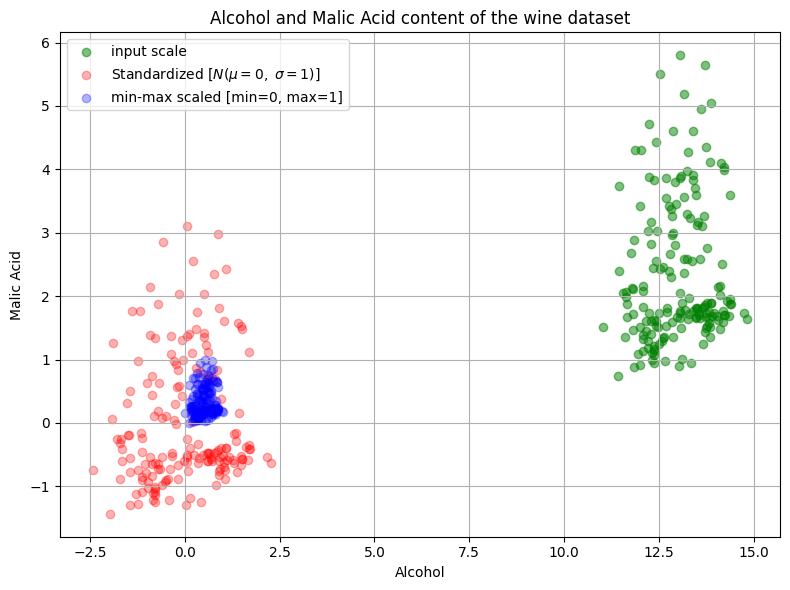

In [42]:

from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'], 
            color='green', label='input scale', alpha=0.5)

    plt.scatter(np_std[:,0], np_std[:,1], color='red', 
            label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)

    plt.scatter(np_minmax[:,0], np_minmax[:,1], 
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')

    plt.legend(loc='upper left')
    plt.grid()
    

    
    plt.tight_layout() # te ajusta para que se vea bien

plot() #¡la acabo de definir yo!



<br>
<br>

The plot above includes the wine datapoints on all three different scales: the input scale where the alcohol content was measured in volume-percent (green), the standardized features (red), and the normalized features (blue).
In the following plot, we will zoom in into the three different axis-scales.

Recordatorio de numpy

In [43]:
# en numpy un array UNIDIMENSIONAL tiene de dimensiones
np.array([0,1,2,3,4]).shape


(5,)

In [44]:
np.array([0,1,2,3,4])

array([0, 1, 2, 3, 4])

In [45]:
# un numpy un array 2D tiene de dimensiones
np.array([[0,1,2,3,4], [5,6,7,8,9]])


array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [46]:
np.array([[0,1,2,3,4], [5,6,7,8,9]]).shape

(2, 5)

In [47]:
# ¡Importante!
# No es lo mismo un array UNIDIMENSIONAL que uno en 2D con solo una fila o solo una columna 

In [48]:
np.array([[0,1,2,3,4]]).shape

(1, 5)

In [49]:
np.array([[0], [1],[2], [3], [4]]).shape

(5, 1)

In [50]:
np.array([[0], [1],[2], [3], [4]])

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [51]:
# un array UNIDIMENSIONAL transpuesto se queda igual
np.array([0,1,2,3,4]).T == np.array([0,1,2,3,4])

array([ True,  True,  True,  True,  True])

In [52]:
np.array([0,1,2,3,4]).T 

array([0, 1, 2, 3, 4])

In [53]:
np.array([0,1,2,3,4])

array([0, 1, 2, 3, 4])

In [54]:
# un array 2D con una fila o una columna sí se transpone

In [55]:
np.array([[0,1,2,3,4]]).T

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [56]:
np.array([[0],[1],[2],[3],[4]]).T

array([[0, 1, 2, 3, 4]])

In [57]:
# veamos el método zip de Python
# zip itera sobre tuplas y crea tuplas nuevas

for x in zip(('azul', 'rojo', 'verde'), ('perro', 'gato'), ["casa", "coche"]):
    print(x)


('azul', 'perro', 'casa')
('rojo', 'gato', 'coche')


In [58]:
# si zip tiene una sola tupla de argumento
for x in zip(("azul", "rojo", "verde")):
    print(x)



('azul',)
('rojo',)
('verde',)


Seguimos con el tratamiento de datos numéricos

<br>
<br>

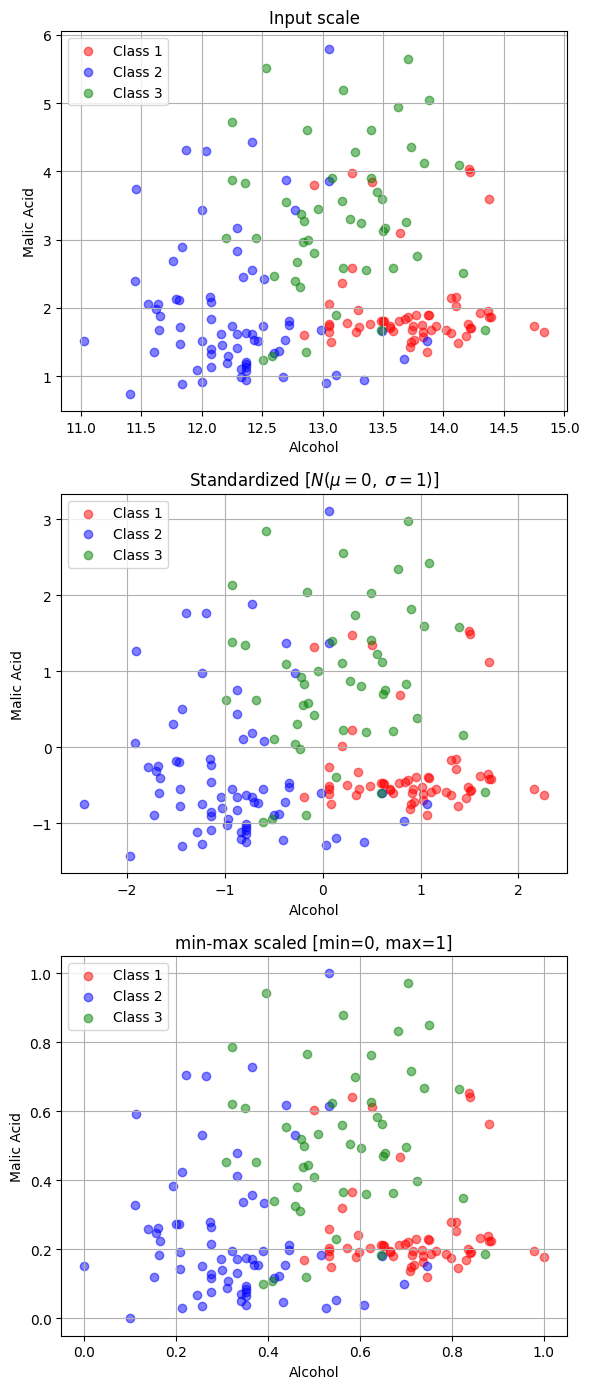

In [59]:


fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)),
               (df[['Alcohol', 'Malic acid']].values, np_std, np_minmax), # values devuelve los valores en tipo numpy
               ('Input scale', 
                'Standardized [$N  (\mu=0, \; \sigma=1)$]', 
                'min-max scaled [min=0, max=1]')
                ):
    # a es 0, 1, 2
    # d es df[['Alcohol', 'Malic acid']].values, np_std, np_minmax 
    # l es 'Input scale', 'Standardized [$N  (\mu=0, \; \sigma=1)$]', 'min-max scaled [min=0, max=1]'
    
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Class label'].values == i, 0], 
                  d[df['Class label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
        # i es 1, 2, 3
        # c es 'red', 'blue', 'green'
        
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()
    




<br>
<br>

In [60]:
# aplicar values a un DataFrame
df_ejemplo = pd.DataFrame({'col1': [1,2,3], 'col2': [4,5,6]})
df_ejemplo.values 
#values devuelve un DataFrame en formato numpy


array([[1, 4],
       [2, 5],
       [3, 6]], dtype=int64)

## Bottom-up approaches

Of course, we can also code the equations for standardization and 0-1 Min-Max scaling "manually". However, the scikit-learn methods are still useful if you are working with test and training data sets and want to scale them equally.

E.g., 
<pre>
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)
</pre>

Below, we will perform the calculations using "pure" Python code, and an more convenient NumPy solution, which is especially useful if we attempt to transform a whole matrix.

<br>
<br>

Just to recall the equations that we are using:

Standardization: \begin{equation} z = \frac{x - \mu}{\sigma} \end{equation} 

with mean:  

\begin{equation}\mu = \frac{1}{N} \sum_{i=1}^N (x_i)\end{equation}

and standard deviation:  

\begin{equation}\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2}\end{equation}


Min-Max scaling: \begin{equation} X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}




In [61]:
# lógica del bucle for

suelto = ["caracter. " + p for p in "hola"]
print(suelto)



['caracter. h', 'caracter. o', 'caracter. l', 'caracter. a']


### Pure Python

In [62]:

# Standardization
x = [1,4,5,6,6,2,3]
mean = sum(x)/len(x)
std_dev = (1/len(x) * sum([ (x_i - mean) ** 2 for x_i in x])) ** 0.5
z_scores = [(x_i - mean)/std_dev for x_i in x]

# Min-Max scaling

minmax = [(x_i - min(x))/(max(x) - min(x)) for x_i in x]



<br>
<br>

### NumPy

In [63]:

import numpy as np
# Standardization
x_np = np.asarray(x) # as array lo convierte en un array de numpy
z_scores_np = (x_np - x_np.mean())/x_np.std()


# Min-Max scaling
np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())



<br>
<br>

### Visualization

Just to make sure that our code works correctly, let us plot the results via matplotlib.

In [64]:
%matplotlib inline

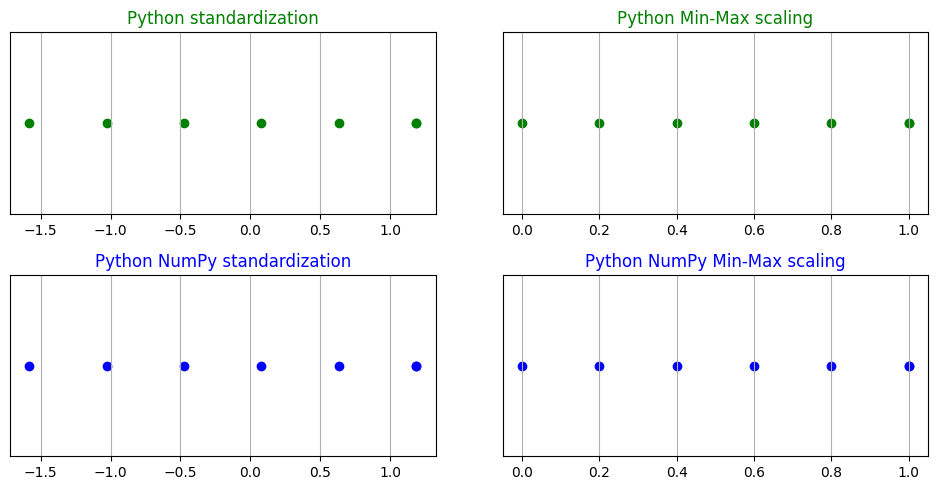

In [65]:


from matplotlib import pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5)) #devuelve fig, ax con 4 subplots

y_pos = [0 for i in range(len(x))]

ax1.scatter(z_scores, y_pos, color='g')
ax1.set_title('Python standardization', color='g')

ax2.scatter(minmax, y_pos, color='g')
ax2.set_title('Python Min-Max scaling', color='g')

ax3.scatter(z_scores_np, y_pos, color='b')
ax3.set_title('Python NumPy standardization', color='b')

ax4.scatter(np_minmax, y_pos, color='b')
ax4.set_title('Python NumPy Min-Max scaling', color='b')
    
plt.tight_layout() # para ajustar la visualización

for ax in (ax1, ax2, ax3, ax4):
    ax.get_yaxis().set_visible(False)
    ax.grid()

plt.show()



In [66]:
# vemos lo mismo, más fácil usando librerías
# estandarizado con valores con media cero y desviación típica 1
# escalado con valores entre 0 y 1

<br>
<br>

## The effect of standardization on PCA in a pattern classification task

[[back to top](#Sections)]

Earlier, I mentioned the Principal Component Analysis (PCA) as an example where standardization is crucial, since it is "analyzing" the variances of the different features.  
Now, let us see how the standardization affects PCA and a following supervised classification on the whole wine dataset.


In the following section, we will go through the following steps:

- Reading in the dataset  
- Dividing the dataset into a separate training and test dataset  
- Standardization of the features    
- Principal Component Analysis (PCA) to reduce the dimensionality   
- Training a naive Bayes classifier  
- Evaluating the classification accuracy with and without standardization  

<br>
<br>

### Reading in the dataset

[[back to top](#Sections)]

In [67]:


import pandas as pd

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv', 
    header=None,
    )



In [68]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<br>
<br>

### Dividing the dataset into a separate training and test dataset

[[back to top](#Sections)]

In [69]:
df[0].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In this step, we will randomly divide the wine dataset into a training dataset and a test dataset where the training dataset will contain 70% of the samples and the test dataset will contain 30%, respectively.

In [70]:
from sklearn.model_selection import train_test_split

X_wine = df.values[:,1:]
y_wine = df.values[:,0]

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,
                                                    test_size=0.3, random_state=12345)




<br>
<br>

### Feature Scaling - Standardization

[[back to top](#Sections)]

In [71]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

<br>
<br>

### Dimensionality reduction via Principal Component Analysis (PCA)

[[back to top](#Sections)]

Now, we perform a PCA on the standardized and the non-standardized datasets to transform the dataset onto a 2-dimensional feature subspace.  
In a real application, a procedure like cross-validation would be done in order to find out what choice of features would yield a optimal balance between "preserving information" and "overfitting" for different classifiers. However, we will omit this step since we don't want to train a perfect classifier here, but merely compare the effects of standardization.

In [72]:
from sklearn.decomposition import PCA

# no estandarizados
pca = PCA(n_components=2).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

# estandarizados
pca_std = PCA(n_components=2).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)

Let us quickly visualize how our new feature subspace looks like (note that class labels are not considered in a PCA - in contrast to a Linear Discriminant Analysis - but I will add them in the plot for clarity).

In [73]:
%matplotlib inline

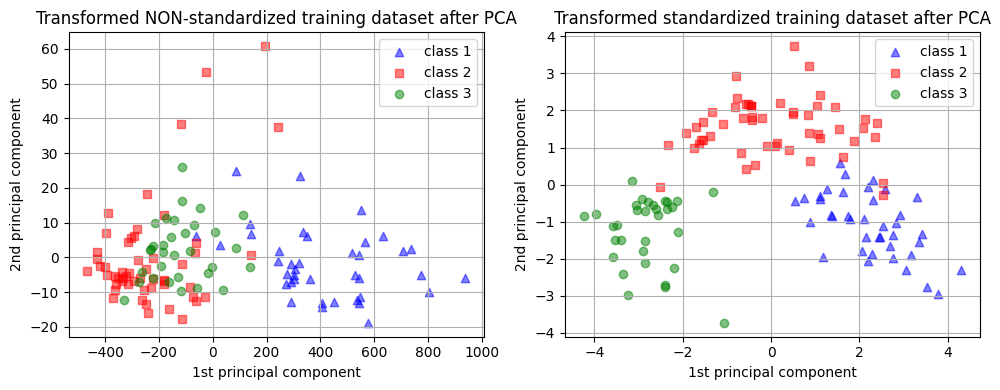

In [74]:


from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))


for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train==l, 0], X_train[y_train==l, 1],
        color=c, 
        label='class %s' %l, 
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train==l, 1],
        color=c, 
        label='class %s' %l, 
        alpha=0.5,
        marker=m
        )

ax1.set_title('Transformed NON-standardized training dataset after PCA')    
ax2.set_title('Transformed standardized training dataset after PCA')    
    
for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()



<br>
<br>

### Training a naive Bayes classifier

[[back to top](#Sections)]

We will use a naive Bayes classifier for the classification task. If you are not familiar with it, the term "naive" comes from the assumption that all features are "independent".  
All in all, it is a simple but robust classifier based on Bayes' rule

Bayes' Rule:


\begin{equation} P(\omega_j|x) = \frac{p(x|\omega_j) * P(\omega_j)}{p(x)} \end{equation}

where 

- &omega;:  class label  
- *P(&omega;|x)*: the posterior probability
- *p(x|&omega;)*: prior probability (or likelihood)

and the **decsion rule:**

Decide $ \omega_1 $ if $ P(\omega_1|x) > P(\omega_2|x) $ else decide $ \omega_2 $.
<br>


\begin{equation}
\Rightarrow \frac{p(x|\omega_1) * P(\omega_1)}{p(x)} > \frac{p(x|\omega_2) * P(\omega_2)}{p(x)}
\end{equation} 


I don't want to get into more detail about Bayes' rule in this article, but if you are interested in a more detailed collection of examples, please have a look at the [Statistical Patter Classification](https://github.com/rasbt/pattern_classification#statistical-pattern-recognition-examples) in my pattern classification repository.



In [51]:
from sklearn.naive_bayes import GaussianNB

# no estandarizados
gnb = GaussianNB()
fit = gnb.fit(X_train, y_train)

# estandarizados

gnb_std = GaussianNB()
fit_std = gnb_std.fit(X_train_std, y_train)




<br>
<br>

### Evaluating the classification accuracy with and without standardization

[[back to top](#Sections)]

In [52]:
from sklearn import metrics

pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset
81.45%

Prediction accuracy for the test dataset
64.81%



In [53]:

pred_train_std = gnb_std.predict(X_train_std)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train_std)))

pred_test_std = gnb_std.predict(X_test_std)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the training dataset
96.77%

Prediction accuracy for the test dataset
98.15%



As we can see, the standardization prior to the PCA definitely led to an decrease in the empirical error rate on classifying samples from test dataset.


# Feature transformations

### Normalization and changing distribution

Monotonic feature transformation is critical for some algorithms and has no effect on others. This is one of the reasons for the increased popularity of decision trees and all its derivative algorithms (random forest, gradient boosting). Not everyone can or want to tinker with transformations, and these algorithms are robust to unusual distributions.

There are also purely engineering reasons: `np.log` is a way of dealing with large numbers that do not fit in `np.float64`. This is an exception rather than a rule; often it's driven by the desire to adapt the dataset to the requirements of the algorithm. Parametric methods usually require a minimum of symmetric and unimodal distribution of data, which is not always given in real data. There may be more stringent requirements; recall [our earlier article about linear models](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-4-linear-classification-and-regression-44a41b9b5220).

However, data requirements are imposed not only by parametric methods; [K nearest neighbors](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-3-classification-decision-trees-and-k-nearest-neighbors-8613c6b6d2cd) will predict complete nonsense if features are not normalized e.g. when one distribution is located in the vicinity of zero and does not go beyond (-1, 1) while the other’s range is on the order of hundreds of thousands.

A simple example: suppose that the task is to predict the cost of an apartment from two variables — the distance from city center and the number of rooms. The number of rooms rarely exceeds 5 whereas the distance from city center can easily be in the thousands of meters.

The simplest transformation is Standard Scaling (or Z-score normalization):

$$ \large z= \frac{x-\mu}{\sigma} $$

Note that Standard Scaling does not make the distribution normal in the strict sense.

In [76]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import beta # beta es un tipo de ditribución
from scipy.stats import shapiro
# shapiro es un test que te dice cómo es de probable
# que tus datos sean gaussianos
import numpy as np

data = beta(1,10).rvs(1000).reshape(-1,1)
shapiro(data)

ShapiroResult(statistic=0.8687678575515747, pvalue=3.880418781696061e-28)

In [77]:
# Value of the statistic, p-value
shapiro(StandardScaler().fit_transform(data))

# we reject H0, they are not Gaussian

ShapiroResult(statistic=0.8687678575515747, pvalue=3.880418781696061e-28)

Hipótesis nula: $\sf{H_{0}}$
Es la hipótesis por que aceptamos o rechazamos. En este caso: los datos vienen de una Gaussiana.
El p-valor es un estadístico que nos dice si es probable que la hipótesis nula sea cierta o sea falsa.
Si p-valor <= 0.05 entonces rechazo $\sf{H_{0}}$ 

But, to some extent, it protects against outliers:

In [56]:
prueba = np.array([1,2,3,4,5]).reshape(-1,1)  # poner un menos es "calcúlalo tú"
prueba

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [57]:
np.array([1,2,3,4,5]).shape

(5,)

In [58]:
prueba.shape

(5, 1)

In [59]:
data = np.array([1,1,0,-1,2,1,2,3,-2,4,100]).reshape(-1,1).astype(np.float64)
StandardScaler().fit_transform(data)

array([[-0.31922662],
       [-0.31922662],
       [-0.35434155],
       [-0.38945648],
       [-0.28411169],
       [-0.31922662],
       [-0.28411169],
       [-0.24899676],
       [-0.42457141],
       [-0.21388184],
       [ 3.15715128]])

In [60]:
(data - data.mean())/data.std()

array([[-0.31922662],
       [-0.31922662],
       [-0.35434155],
       [-0.38945648],
       [-0.28411169],
       [-0.31922662],
       [-0.28411169],
       [-0.24899676],
       [-0.42457141],
       [-0.21388184],
       [ 3.15715128]])

Another fairly popular option is MinMax Scaling, which brings all the points within a predetermined interval (typically (0, 1)).

$$ \large X_{norm}=\frac{X-X_{min}}{X_{max}-X_{min}} $$

In [61]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler().fit_transform(data)

array([[0.02941176],
       [0.02941176],
       [0.01960784],
       [0.00980392],
       [0.03921569],
       [0.02941176],
       [0.03921569],
       [0.04901961],
       [0.        ],
       [0.05882353],
       [1.        ]])

In [62]:
(data - data.min()/(data.max() - data.min()))

array([[ 1.01960784e+00],
       [ 1.01960784e+00],
       [ 1.96078431e-02],
       [-9.80392157e-01],
       [ 2.01960784e+00],
       [ 1.01960784e+00],
       [ 2.01960784e+00],
       [ 3.01960784e+00],
       [-1.98039216e+00],
       [ 4.01960784e+00],
       [ 1.00019608e+02]])

StandardScaling and MinMax Scaling have similar applications and are often more or less interchangeable. However, if the algorithm involves the calculation of distances between points or vectors, the default choice is StandardScaling. But MinMax Scaling is useful for visualization by bringing features within the interval (0, 255).

If we assume that some data is not normally distributed but is described by the [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution), it can easily be transformed to a normal distribution:

In [82]:
from scipy.stats import lognorm
data = lognorm(s=1).rvs(1000) # no le estoy pasando la semilla
shapiro(data)

ShapiroResult(statistic=0.5690604448318481, pvalue=4.203895392974451e-44)

In [83]:
shapiro(np.log(data))  #  lognormal 

ShapiroResult(statistic=0.9961288571357727, pvalue=0.013535752892494202)

The lognormal distribution is suitable for describing salaries, price of securities, urban population, number of comments on articles on the internet, etc. However, to apply this procedure, the underlying distribution does not necessarily have to be lognormal; you can try to apply this transformation to any distribution with a heavy right tail. Furthermore, one can try to use other similar transformations, formulating their own hypotheses on how to approximate the available distribution to a normal. Examples of such transformations are [Box-Cox transformation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html) (logarithm is a special case of the Box-Cox transformation) or [Yeo-Johnson transformation](https://gist.github.com/mesgarpour/f24769cd186e2db853957b10ff6b7a95) (extends the range of applicability to negative numbers). In addition, you can also try adding a constant to the feature — `np.log (x + const)`.


# Binning

In [85]:
import pandas as pd

fcc_survey_df = pd.read_csv("Ficheros/fcc_2016_coder_survey_subset.csv", encoding = "utf-8", sep=',')
fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()
#fcc_survey_df

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


## Fixed-width binning

### Developer age distribution

Text(0, 0.5, 'Frequency')

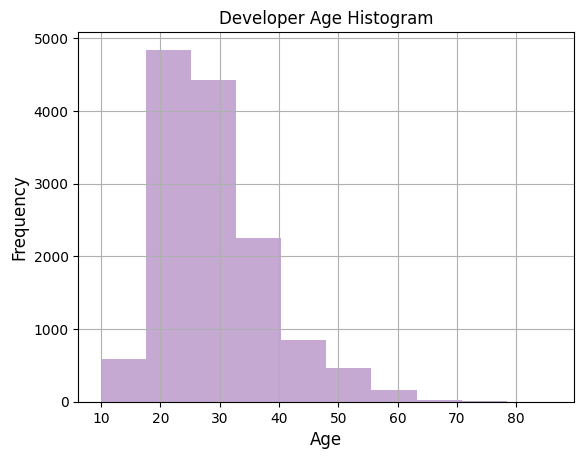

In [86]:
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#C5A9D3')
ax.set_title("Developer Age Histogram", fontsize = 12)
ax.set_xlabel("Age", fontsize = 12)
ax.set_ylabel("Frequency", fontsize = 12)

### Binning based on rounding

``` 
Age Range: Bin
---------------
 0 -  9  : 0
10 - 19  : 1
20 - 29  : 2
30 - 39  : 3
40 - 49  : 4
50 - 59  : 5
60 - 69  : 6
  ... and so on
```

In [87]:
fcc_survey_df['Age_bin_round'] = (np.floor((fcc_survey_df['Age'])/10))

In [88]:
fcc_survey_df['Age_bin_round']

0        2.0
1        2.0
2        1.0
3        2.0
4        2.0
        ... 
15615    3.0
15616    2.0
15617    3.0
15618    2.0
15619    2.0
Name: Age_bin_round, Length: 15620, dtype: float64

### Binning based on custom ranges

``` 
Age Range : Bin
---------------
 0 -  15  : 1
16 -  30  : 2
31 -  45  : 3
46 -  60  : 4
61 -  75  : 5
75 - 100  : 6
```

In [89]:
# cut crea bins

bin_ranges = [0,15,30,45,60,75,100]  #  [0-15]   (15-30]   (30-45]  (45-60]  (60-75]  (75-100]
bin_names = [1,2,3,4,5,6]

fcc_survey_df['Age_bin_custom_range'] = pd.cut(fcc_survey_df['Age'],
bins = bin_ranges)

fcc_survey_df['Age_bin_custom_label'] = pd.cut(fcc_survey_df['Age'], bins = bin_ranges, labels = bin_names)
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round',
'Age_bin_custom_range', 'Age_bin_custom_label']].iloc[1071:1076]



,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0,"(15, 30]",2
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0,"(30, 45]",3
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0,"(15, 30]",2
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0,"(45, 60]",4
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0,"(30, 45]",3


## Quantile based binning

In [70]:
fcc_survey_df[['ID.x', 'Age', 'Income']].iloc[4:9]

,ID.x,Age,Income
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0
7,6dff182db452487f07a47596f314bddc,35.0,40000.0
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0


Text(0, 0.5, 'Frequency')

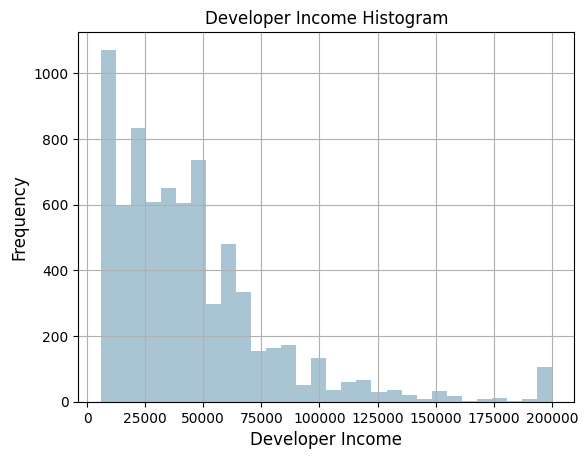

In [71]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color="#A9C5D3")
ax.set_title("Developer Income Histogram", fontsize = 12)
ax.set_xlabel("Developer Income", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)

In [72]:
quantile_list = [0, .25, .5, .75, 1]
quantiles = fcc_survey_df['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

Text(0, 0.5, 'Frequency')

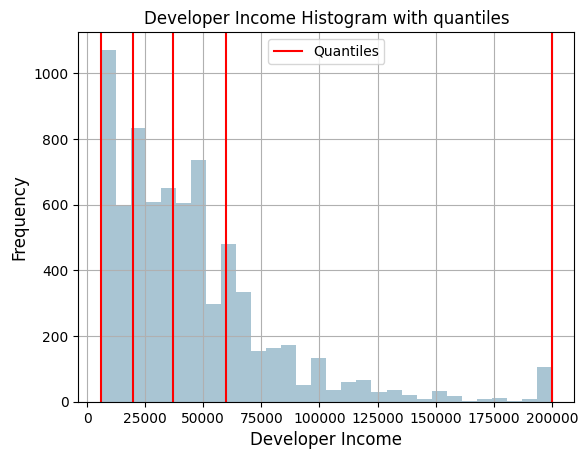

In [73]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color="#A9C5D3")

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Developer Income Histogram with quantiles', fontsize=12)
ax.set_xlabel("Developer Income", fontsize= 12)
ax.set_ylabel("Frequency", fontsize=12)

In [74]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
fcc_survey_df['Income_quantile_range'] = pd.qcut(fcc_survey_df['Income'],
                                            q = quantile_list)
fcc_survey_df['Income_quantile_label'] = pd.qcut(fcc_survey_df['Income'],
q = quantile_list,
labels = quantile_labels)

fcc_survey_df[['ID.x', 'Age', 'Income',
'Income_quantile_range', 'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


# Mathematical Transformations

## Log transform

In [75]:
fcc_survey_df['Income_log'] = np.log((1+ fcc_survey_df['Income']))
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]

,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


Text(11.5, 450, '$\\mu$=10.43')

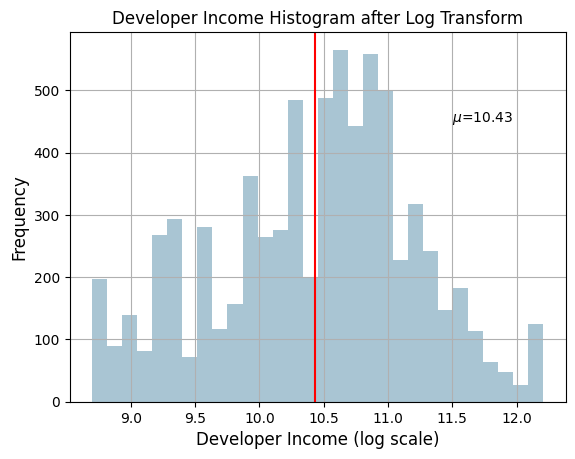

In [76]:
income_log_mean = np.round(np.mean(fcc_survey_df['Income_log']), 2)
fig, ax = plt.subplots()
fcc_survey_df['Income_log'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after Log Transform',
            fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

## Box–Cox transform

In [77]:
from scipy import stats

# get optimal lambda value from non null income values
income = np.array(fcc_survey_df['Income'])
income_clean = income[~np.isnan(income)] # los no nan
l, opt_lambda = stats.boxcox(income_clean)
print('Optimal lambda value:', opt_lambda)

Optimal lambda value: 0.11799122497648248


In [78]:
fcc_survey_df['Income_boxcox_lambda_0'] = stats.boxcox((1+fcc_survey_df['Income']), 
                                                         lmbda=0)
fcc_survey_df['Income_boxcox_lambda_opt'] = stats.boxcox(fcc_survey_df['Income'], 
                                                           lmbda=opt_lambda)
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log', 
               'Income_boxcox_lambda_0', 'Income_boxcox_lambda_opt']].iloc[4:9]

,ID.x,Age,Income,Income_log,Income_boxcox_lambda_0,Income_boxcox_lambda_opt
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681,8.699681,15.180667
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660,10.596660,21.115340
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522,10.373522,20.346418
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660,10.596660,21.115340
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794,11.289794,23.637128


Text(24, 450, '$\\mu$=20.65')

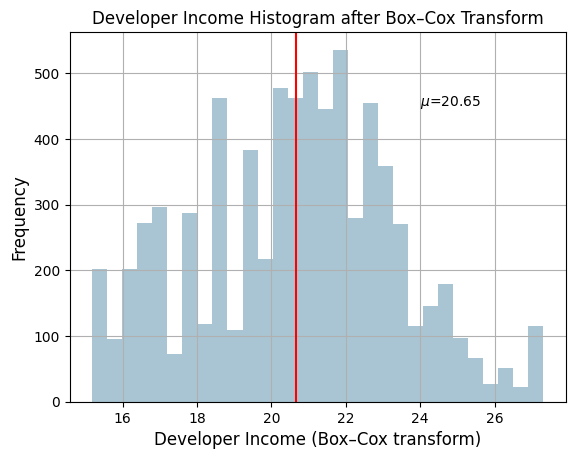

In [79]:
income_boxcox_mean = np.round(np.mean(fcc_survey_df['Income_boxcox_lambda_opt']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income_boxcox_lambda_opt'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_boxcox_mean, color='r')
ax.set_title('Developer Income Histogram after Box–Cox Transform', fontsize=12)
ax.set_xlabel('Developer Income (Box–Cox transform)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(24, 450, r'$\mu$='+str(income_boxcox_mean), fontsize=10)